## Basic Exploratory Data Analysis on Lagos House Prices
- The dataset contains 5336 records of rental properties around 7 location in Lagos.The dataset was sourced from a Nigeria real estate company.

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visuals
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load and read the dataset file
'''inside the quotation mark, paste your file path of the dataset'''
lagos_data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\ML Notebooks\Python_for_Data_Science_files\lagos_house_prices_raw.csv') # csv file - for excel ==> pd.read_excel(r'')
lagos_data

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,650000.0,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,450000.0,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,800000.0,Detached duplex,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,ajah,1,1,2,600000.0,Mini flat,1,0,0,0,0,0,0,0,0
5332,ajah,2,2,2,700000.0,Mini flat,1,0,0,0,0,0,0,0,0
5333,ajah,4,4,5,1700000.0,Semi detached duplex,1,0,0,0,0,0,0,0,0
5334,ajah,1,1,2,500000.0,Mini flat,0,0,0,0,0,0,0,0,0


In [3]:
# check first 5 rows
lagos_data.head()

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,650000.0,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,450000.0,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,800000.0,Detached duplex,0,1,0,0,0,0,0,0,0


In [4]:
# check last 5 rows
lagos_data.tail()

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
5331,ajah,1,1,2,600000.0,Mini flat,1,0,0,0,0,0,0,0,0
5332,ajah,2,2,2,700000.0,Mini flat,1,0,0,0,0,0,0,0,0
5333,ajah,4,4,5,1700000.0,Semi detached duplex,1,0,0,0,0,0,0,0,0
5334,ajah,1,1,2,500000.0,Mini flat,0,0,0,0,0,0,0,0,0
5335,ajah,4,4,5,1800000.0,Semi detached duplex,1,1,0,1,0,0,0,0,0


## Data Inspection and Manipulation

In [5]:
# shape of the dataset
lagos_data.shape

(5336, 15)

In [6]:
# check the columns
lagos_data.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [7]:
# check the data types
lagos_data.dtypes

location           object
bed                 int64
bath                int64
toilet              int64
price             float64
Property_Type      object
Parking_Space       int64
Security            int64
Electricity         int64
Furnished           int64
Security_Doors      int64
CCTV                int64
Pool                int64
Gym                 int64
BQ                  int64
dtype: object

In [8]:
# info of the data
lagos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5336 non-null   object 
 1   bed             5336 non-null   int64  
 2   bath            5336 non-null   int64  
 3   toilet          5336 non-null   int64  
 4   price           5336 non-null   float64
 5   Property_Type   5336 non-null   object 
 6   Parking_Space   5336 non-null   int64  
 7   Security        5336 non-null   int64  
 8   Electricity     5336 non-null   int64  
 9   Furnished       5336 non-null   int64  
 10  Security_Doors  5336 non-null   int64  
 11  CCTV            5336 non-null   int64  
 12  Pool            5336 non-null   int64  
 13  Gym             5336 non-null   int64  
 14  BQ              5336 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 625.4+ KB


In [9]:
# checking for missing values
lagos_data.isnull().sum() # isna().sum() 

location          0
bed               0
bath              0
toilet            0
price             0
Property_Type     0
Parking_Space     0
Security          0
Electricity       0
Furnished         0
Security_Doors    0
CCTV              0
Pool              0
Gym               0
BQ                0
dtype: int64

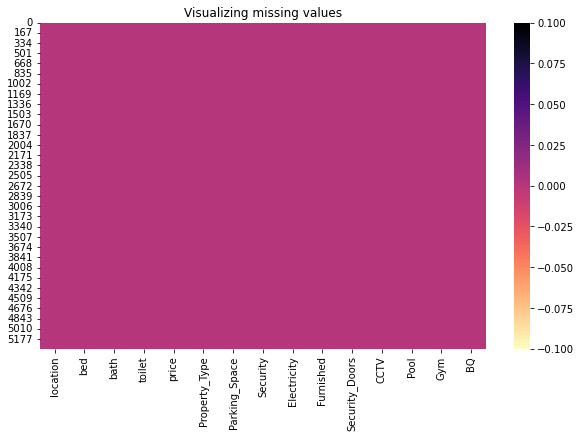

In [10]:
# visualize the missing values
plt.figure(figsize = (10, 6))
plt.title('Visualizing missing values')
sns.heatmap(lagos_data.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

In [11]:
# statistical descriptive analysis of the numerical features
lagos_data.describe().astype('int')

,bed,bath,toilet,price,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
count,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336
mean,1,1,1,645566,0,0,0,0,0,0,0,0,0
std,0,0,0,469305,0,0,0,0,0,0,0,0,0
min,1,1,1,150,0,0,0,0,0,0,0,0,0
25%,1,1,1,350000,0,0,0,0,0,0,0,0,0
50%,1,1,1,500000,0,0,0,0,0,0,0,0,0
75%,1,2,2,800000,0,0,0,0,0,0,0,0,0
max,5,5,5,2450000,1,1,1,1,1,1,1,1,1


## Exploratory Data Analysis: Relationship, Insights and Visualization
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis
- considering one feature of the dataset

In [12]:
lagos_data.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [13]:
# How many listing are there per location?
count_listing = lagos_data['location'].value_counts().sort_values(ascending = False)
count_listing

location
yaba             1460
ajah              900
surulere          728
gbagada           692
ikorodu           578
lekki phase 1     521
ikeja             457
Name: count, dtype: int64

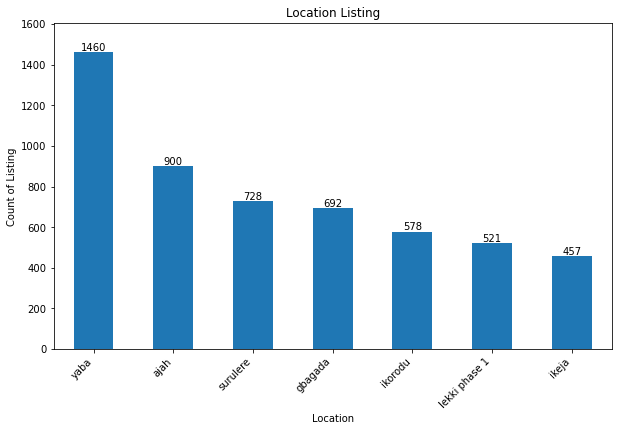

In [14]:
# visualize using bar chart
ax = count_listing.plot(kind='bar', figsize=(10, 6), title='Location Listing', 
                        xlabel='Location', ylabel='Count of Listing', legend=False)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and edge of the figure
ax.margins(y=0.1)

# rotate the x-labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# show the visual
plt.show()

## Observation
Yaba has the highest count of listing with a total value of 1460 while Ikeja has the lowest count of listing with total value of 457

### Bivariate Analysis
- Considering two features, their relationship and its visualization

In [15]:
# summary statistics per location and price
lagos_data.groupby(['location'])['price'].describe().astype('int') 

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
ajah,900,693335,475287,120000,400000,500000,800000,2400000
gbagada,692,742290,451011,150,400000,600000,900000,2300000
ikeja,457,772700,506704,4000,450000,600000,850000,2300000
ikorodu,578,155095,138067,16000,100000,100000,160000,1500000
lekki phase 1,521,1211013,489304,3000,800000,1300000,1500000,2450000
surulere,728,589189,335065,130000,350000,500000,700000,2300000
yaba,1460,550986,331439,250,350000,450000,650000,2000000


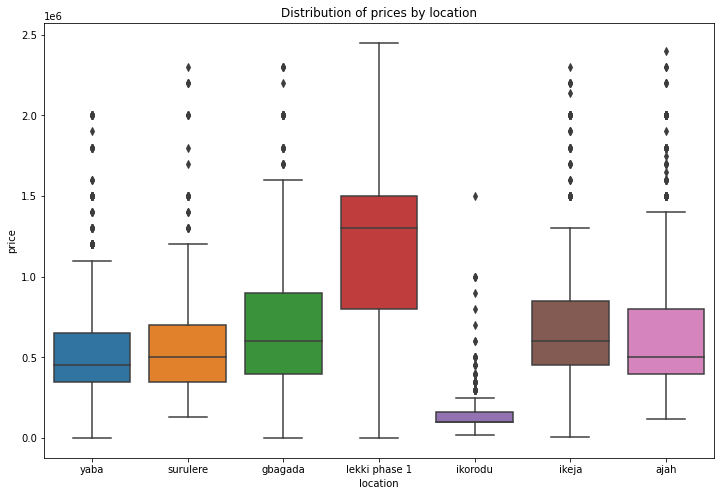

In [16]:
#view distribution of prices by location
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'location', y = 'price', data = lagos_data)
plt.title('Distribution of prices by location')
plt.show()

In [17]:
# which location is with more security facilities like CCTV Camera?
cctv_loc = lagos_data.groupby(['location'])['CCTV'].sum().sort_values(ascending = True)
cctv_loc

location
lekki phase 1     0
gbagada           1
ajah              3
ikeja             5
yaba              5
ikorodu           8
surulere         12
Name: CCTV, dtype: int64

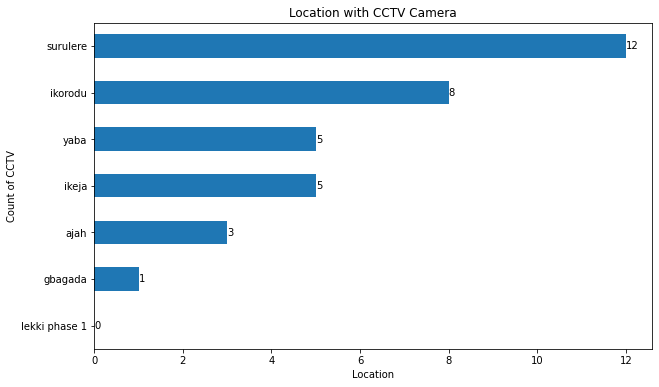

In [18]:
# visualize using bar chart
ax = cctv_loc.plot(kind='barh', figsize=(10, 6), title='Location with CCTV Camera', 
                        ylabel='Count of CCTV', xlabel='Location', legend=False)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and edge of the figure
ax.margins(y=0.1)


# show the visual
plt.show()

In [19]:
lagos_data.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [21]:
# What houses type are the cheapest for the highest number of rooms for families that want affordables
min_loc = lagos_data.groupby('Property_Type')['price'].min().sort_values(ascending = False)
min_loc

Property_Type
Massionette house         2200000.0
Terraced duplex            750000.0
Penthouse flat             700000.0
Semi detached bungalow     600000.0
Blocks of flats            500000.0
Detached bungalow          400000.0
Semi detached duplex        60000.0
Flat / apartment            45000.0
Detached duplex              4000.0
Mini flat                    3000.0
Self contain                  150.0
Name: price, dtype: float64

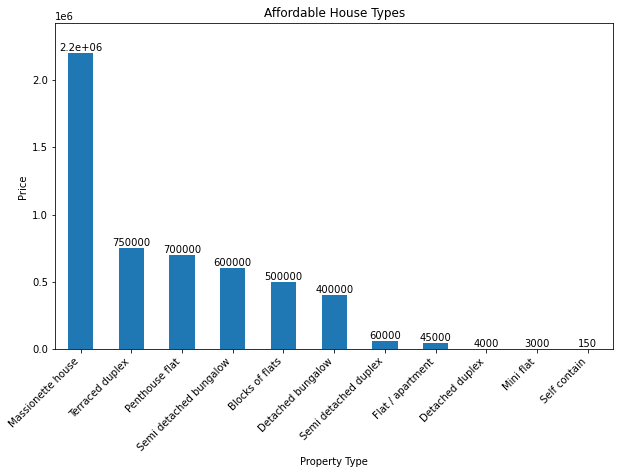

In [23]:
# visualize using bar chart
ax = min_loc.plot(kind='bar', figsize=(10, 6), title='Affordable House Types', 
                        xlabel='Property Type', ylabel='Price', legend=False)

# set x-axis tick labels and rotation
ax.set_xticklabels(min_loc.index, rotation = 45, ha = 'right')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and edge of the figure
ax.margins(y=0.1)


# show the visual
plt.show()

## Observation
Self contain is the cheapest house type with a price of 150 followed by Mini-flat with a price of 3000.

In [24]:
# To know the location for the cheapest self contain
self_loc = lagos_data.groupby(['location', 'Property_Type'])['price'].min().astype('int').unstack('Property_Type')
self_loc

Property_Type,Blocks of flats,Detached bungalow,Detached duplex,Flat / apartment,Massionette house,Mini flat,Penthouse flat,Self contain,Semi detached bungalow,Semi detached duplex,Terraced duplex
location,,,,,,,,,,,
ajah,650000.0,600000.0,500000.0,180000.0,NaN,200000.0,700000.0,120000.0,600000.0,900000.0,750000.0
gbagada,650000.0,1000000.0,900000.0,45000.0,NaN,150000.0,800000.0,150.0,NaN,1200000.0,1500000.0
ikeja,1000000.0,1500000.0,4000.0,300000.0,NaN,200000.0,NaN,180000.0,NaN,60000.0,1800000.0
ikorodu,NaN,450000.0,NaN,120000.0,NaN,16000.0,NaN,36000.0,NaN,1000000.0,NaN
lekki phase 1,NaN,400000.0,250000.0,600000.0,2200000.0,3000.0,1600000.0,10000.0,NaN,1500000.0,1600000.0
surulere,500000.0,1500000.0,1000000.0,350000.0,NaN,150000.0,850000.0,130000.0,NaN,2000000.0,NaN
yaba,600000.0,NaN,800000.0,300000.0,NaN,35000.0,800000.0,250.0,NaN,2000000.0,NaN


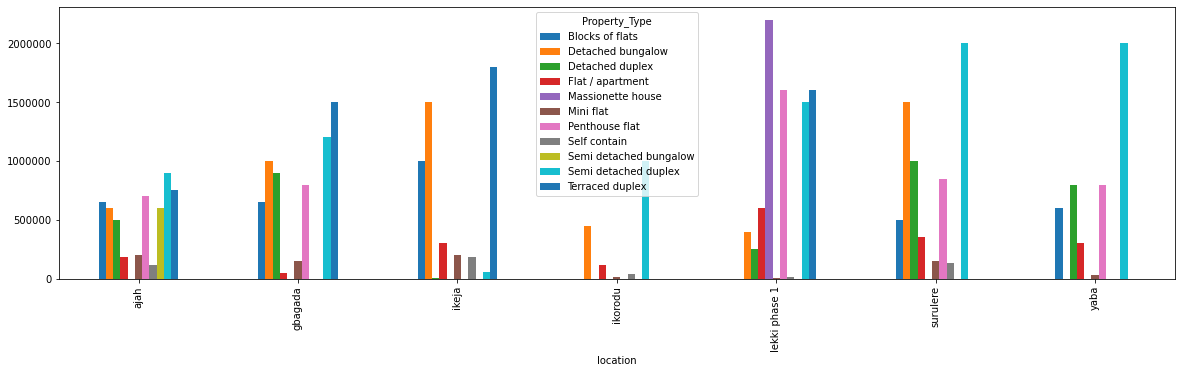

In [25]:
# plot a pivot table
self_loc.plot.bar(figsize = (20, 5))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

In [29]:
# Top 3 location by Price
top3_loc = lagos_data.groupby('location')['price'].sum().sort_values(ascending = False)[:3]
top3_loc

location
yaba             804440839.0
lekki phase 1    630938000.0
ajah             624002009.0
Name: price, dtype: float64

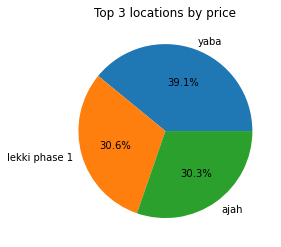

In [30]:
# Create a list of labels for the pie chart
labels = list(top3_loc.index)

# Create a list of values for the pie chart
values = list(top3_loc.values)

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Top 3 locations by price')

# Display the pie chart
plt.show()

In [32]:
# Bottom 3 location by Price
bot3_loc = lagos_data.groupby('location')['price'].sum().sort_values(ascending = False)[4:]
bot3_loc

location
surulere    428930009.0
ikeja       353124000.0
ikorodu      89645000.0
Name: price, dtype: float64

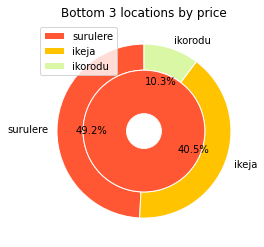

In [33]:
# Create a list of labels for the donut chart
labels = list(bot3_loc.index)

# Create a list of values for the donut chart
values = list(bot3_loc.values)

# Create the outer ring of the donut chart
outer_colors = ['#FF5733', '#FFC300', '#DAF7A6']

# Create the inner ring of the donut chart
inner_colors = ['#FF5733', '#FFC300', '#DAF7A6']

# Create the donut chart with two rings
fig, ax = plt.subplots()

# Set the width of the outer ring to 0.3
wedgeprops = {'width': 0.3, 'edgecolor': 'white'}

# Create the outer ring
outer = ax.pie(values, labels=labels, colors=outer_colors, wedgeprops=wedgeprops, startangle=90, autopct='%1.1f%%')

# Set the width of the inner ring to 0.5
wedgeprops = {'width': 0.5, 'edgecolor': 'white'}

# Create the inner ring
inner = ax.pie([sum(values)], colors=inner_colors, radius=0.7, wedgeprops=wedgeprops, startangle=90)

# Add a title to the donut chart
ax.set_title('Bottom 3 locations by price')

# Add a legend to the donut chart
ax.legend(outer[0], labels, loc='upper left')

# Display the donut chart
plt.show()

In [35]:
# locations with swimming pool facilities
pool_loc = lagos_data.groupby('location')['Pool'].sum().sort_values(ascending = False)
pool_loc

location
lekki phase 1    15
gbagada           7
ikeja             5
surulere          3
ajah              1
yaba              1
ikorodu           0
Name: Pool, dtype: int64

In [36]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


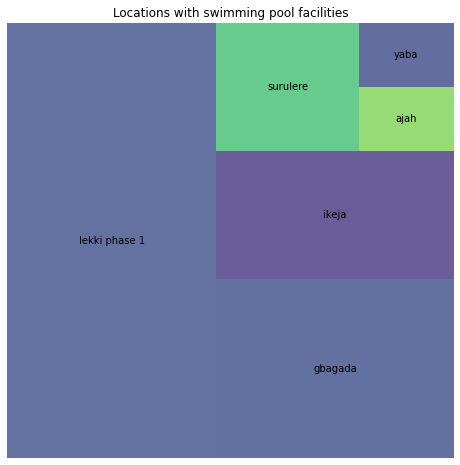

In [42]:
import squarify
# filter out zero values
pool_loc = pool_loc[pool_loc > 0]

# Define the treemap layout
fig, ax = plt.subplots(figsize=(8, 8))
squarify.plot(sizes=pool_loc.values, label=pool_loc.index, alpha=0.8)

# Add a title to the treemap chart
ax.set_title('Locations with swimming pool facilities')

# Remove axis ticks and labels
plt.axis('off')

# Display the treemap chart
plt.show()

## Multivariate Analysis
- it is considering two or more features, their relationship and its visualization

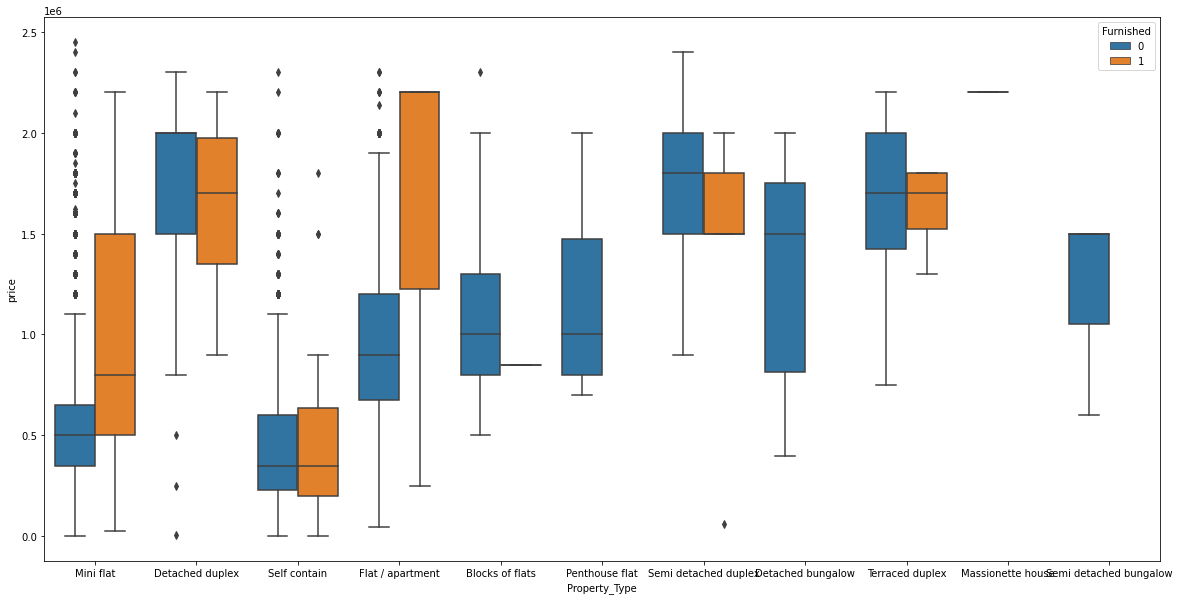

In [43]:
# visualize property type and furnished apartment by price
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'Property_Type', y = 'price', data = lagos_data, hue = 'Furnished')
plt.show()

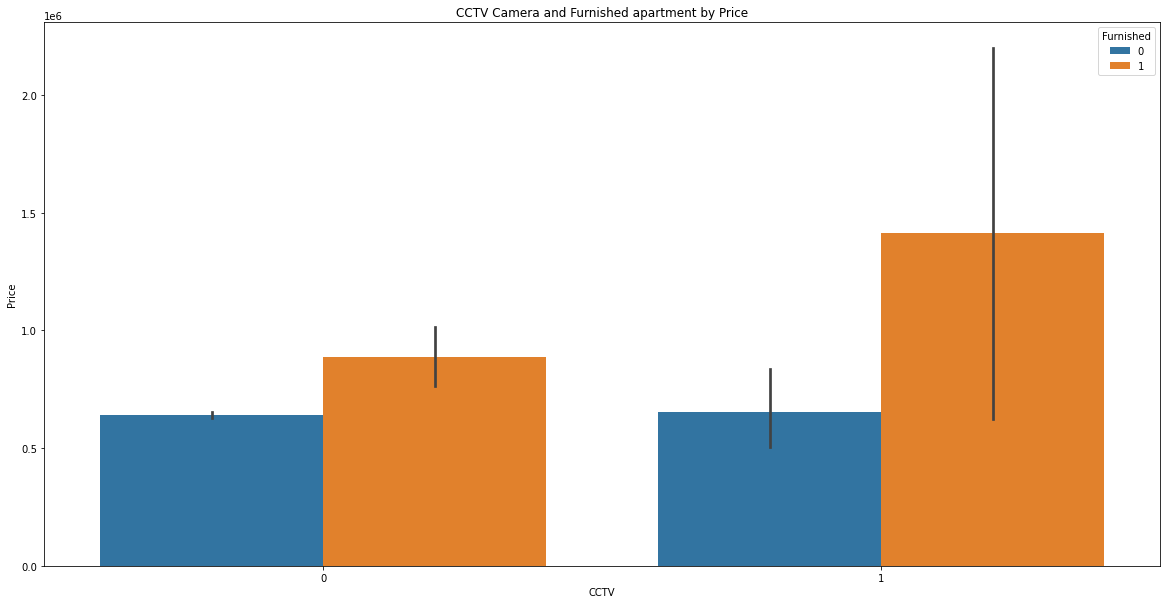

In [44]:
# visualize CCTV Camera and Furnished apartment by Price
plt.figure(figsize = (20, 10))
sns.barplot(x = 'CCTV', y = 'price', data = lagos_data, hue = 'Furnished')

# add labels and title
plt.xlabel('CCTV')
plt.ylabel('Price')
plt.title('CCTV Camera and Furnished apartment by Price')

# add legend
plt.legend(title = 'Furnished', loc = 'upper right')

# show the chart
plt.show()

In [46]:
lagos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5336 non-null   object 
 1   bed             5336 non-null   int64  
 2   bath            5336 non-null   int64  
 3   toilet          5336 non-null   int64  
 4   price           5336 non-null   float64
 5   Property_Type   5336 non-null   object 
 6   Parking_Space   5336 non-null   int64  
 7   Security        5336 non-null   int64  
 8   Electricity     5336 non-null   int64  
 9   Furnished       5336 non-null   int64  
 10  Security_Doors  5336 non-null   int64  
 11  CCTV            5336 non-null   int64  
 12  Pool            5336 non-null   int64  
 13  Gym             5336 non-null   int64  
 14  BQ              5336 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 625.4+ KB


<AxesSubplot:>

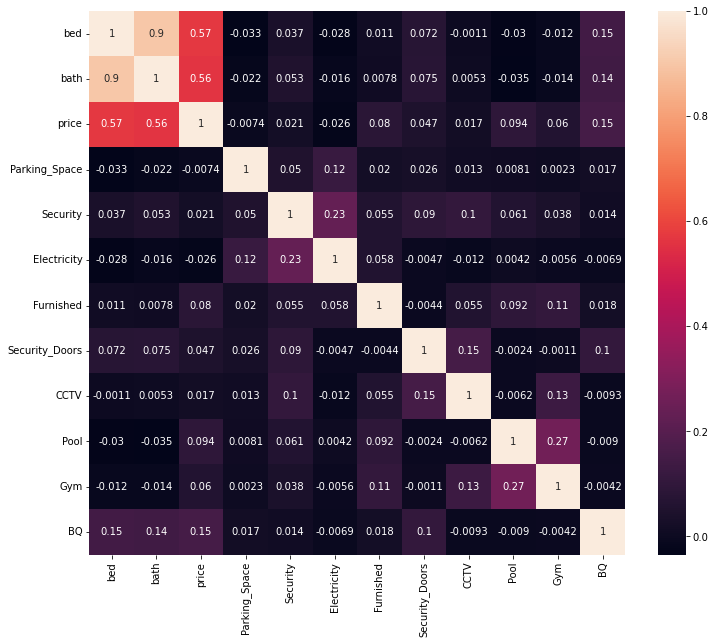

In [47]:
# select numerical columns
num_cols = ['bed', 'bath', 'price', 'Parking_Space', 'Security', 'Electricity', 'Furnished', 
           'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ']

# calculate the correlation matrix
corr_matrix = lagos_data[num_cols].corr()

# visualize the correlation matrix
plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot = True)

<AxesSubplot:>

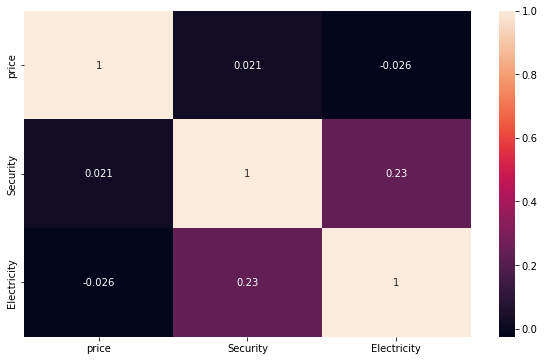

In [48]:
num_col1 = ['price','Security', 'Electricity']

# calculate the correlation matrix
corr_matrix = lagos_data[num_col1].corr()

# visualize the correlation matrix
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True)

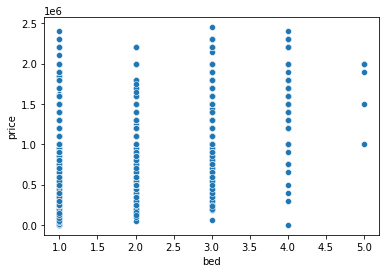

In [53]:
# scatter plot
sns.scatterplot(x = 'bed', y = 'price', data = lagos_data)
plt.show()

In [52]:
lagos_data['bed']

0       1
1       1
2       1
3       1
4       3
       ..
5331    1
5332    2
5333    4
5334    1
5335    4
Name: bed, Length: 5336, dtype: int64

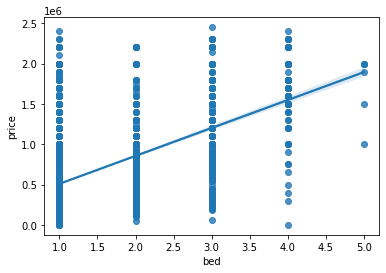

In [54]:
# regplot
sns.regplot(x = 'bed', y = 'price', data = lagos_data)
plt.show()